# Midterm Project - Coffee Ratings
### Max Moran

### Research Questions:
1. What metrics from Q Graders have any significant effect on score?2. 
Is this category useful


## Import Libraries & Data

In [398]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [400]:
coffee = pd.read_csv('coffee_ratings.csv')
coffee.head()

,total_cup_points,species,owner,country_of_origin,farm_name,lot_number,mill,ico_number,company,altitude,...,color,category_two_defects,expiration,certification_body,certification_address,certification_contact,unit_of_measurement,altitude_low_meters,altitude_high_meters,altitude_mean_meters
0,90.58,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,0,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
1,89.92,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,1,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0
2,89.75,Arabica,grounds for health admin,Guatemala,"san marcos barrancas ""san cristobal cuch",NaN,NaN,NaN,NaN,1600 - 1800 m,...,NaN,0,"May 31st, 2011",Specialty Coffee Association,36d0d00a3724338ba7937c52a378d085f2172daa,0878a7d4b9d35ddbf0fe2ce69a2062cceb45a660,m,1600.0,1800.0,1700.0
3,89.00,Arabica,yidnekachew dabessa,Ethiopia,yidnekachew dabessa coffee plantation,NaN,wolensu,NaN,yidnekachew debessa coffee plantation,1800-2200,...,Green,2,"March 25th, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1800.0,2200.0,2000.0
4,88.83,Arabica,metad plc,Ethiopia,metad plc,NaN,metad plc,2014/2015,metad agricultural developmet plc,1950-2200,...,Green,2,"April 3rd, 2016",METAD Agricultural Development plc,309fcf77415a3661ae83e027f7e5f05dad786e44,19fef5a731de2db57d16da10287413f5f99bc2dd,m,1950.0,2200.0,2075.0


## Clean Data

### Check for Duplicates

In [404]:
duplicated_coffee = coffee[coffee.duplicated()]
print("Duplicate rows: ", duplicated_coffee.shape)

Duplicate rows:  (0, 43)


### Grab relevant columns

In [407]:
qBasedCoffee = coffee[['total_cup_points','certification_body']]
qBasedCoffee.head()

,total_cup_points,certification_body
0,90.58,METAD Agricultural Development plc
1,89.92,METAD Agricultural Development plc
2,89.75,Specialty Coffee Association
3,89.00,METAD Agricultural Development plc
4,88.83,METAD Agricultural Development plc


### Visualization
Let's display a basic chart to better visualize the distribution of certification bodies and total cup points.

C:\Users\might\AppData\Local\Temp\ipykernel_13728\4189623003.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(certBodies, rotation=90)


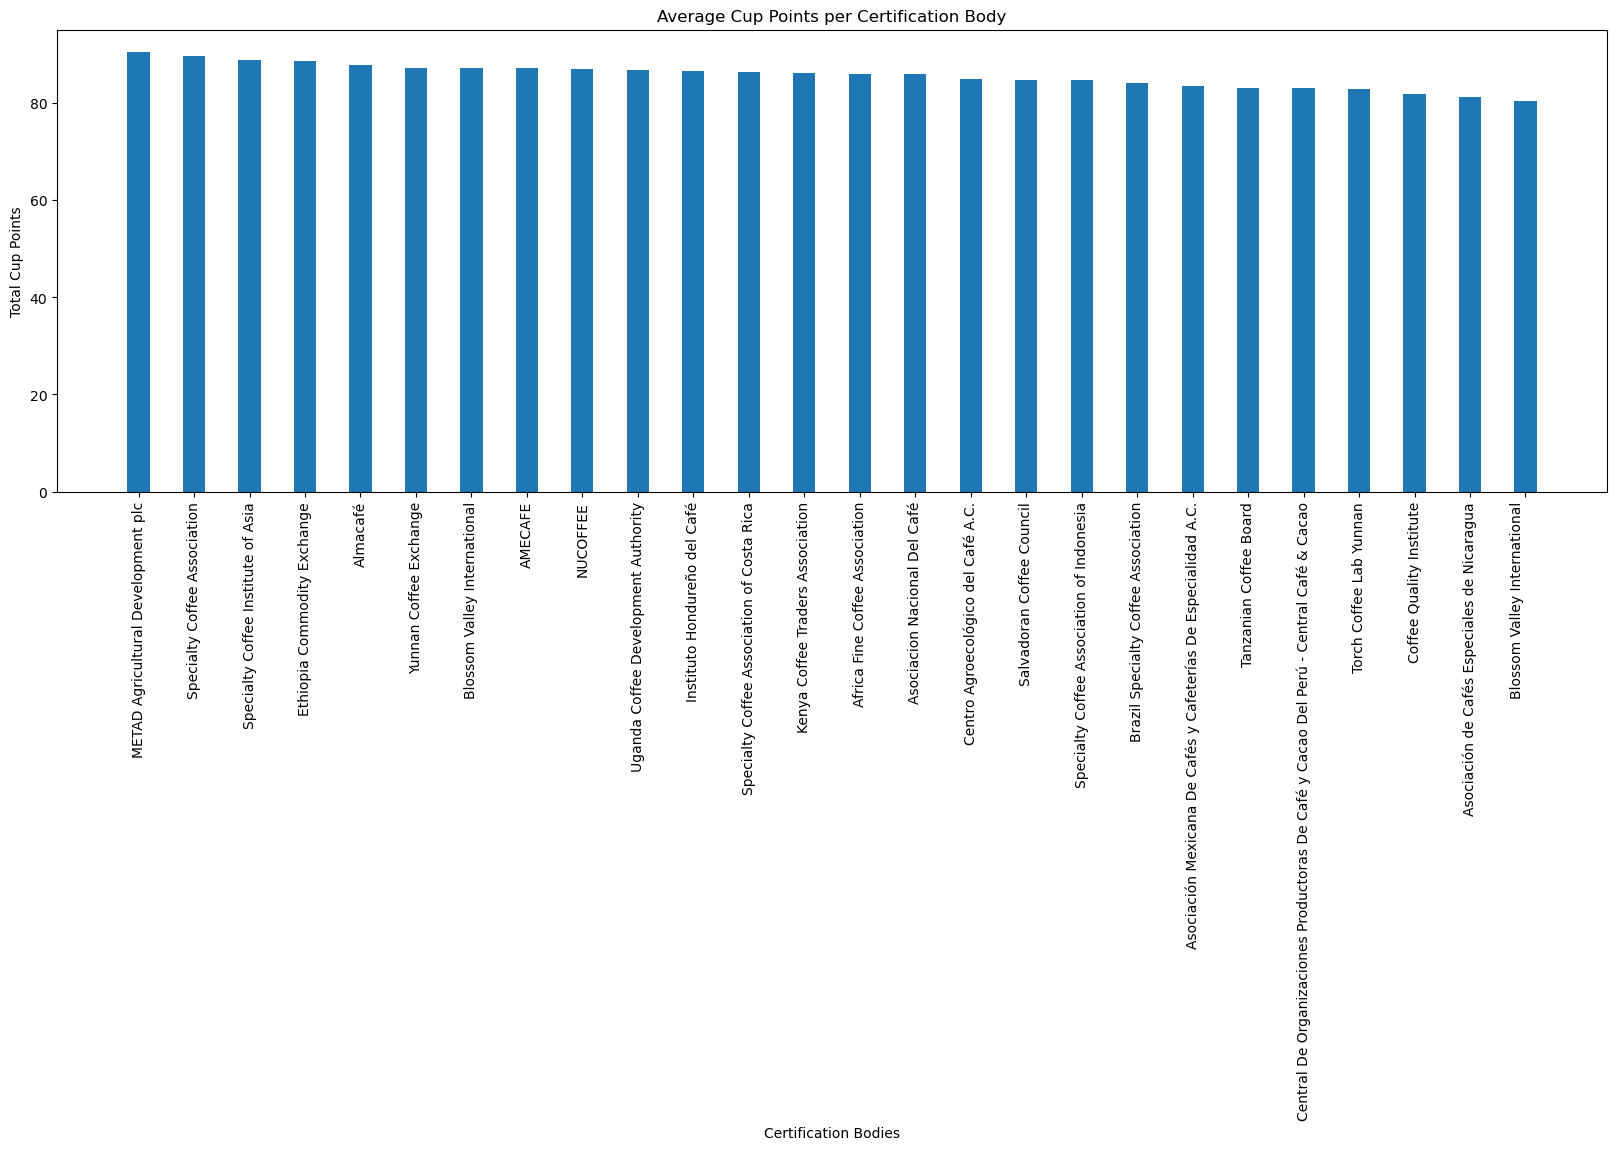

In [410]:
plt.figure(figsize=(20, 6))
plt.bar(qBasedCoffee['certification_body'], qBasedCoffee['total_cup_points'], width = 0.4) 
plt.xlabel("Certification Bodies")
plt.ylabel("Total Cup Points")
plt.title("Average Cup Points per Certification Body")
ax1 = plt.subplot()
ax1.set_xticklabels(certBodies, rotation=90)
plt.show()

### Visual Inspection
You can see perhaps a slight downwards slope but nothing significant. Let's check by running a linear regression model.

### Basic Linear Model

In [411]:
from statsmodels.formula.api import ols

fit = ols('total_cup_points ~ C(certification_body)', data=qBasedCoffee).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_cup_points   R-squared:                       0.122
Model:                            OLS   Adj. R-squared:                  0.105
Method:                 Least Squares   F-statistic:                     7.277
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           7.08e-24
Time:                        00:18:08   Log-Likelihood:                -3490.3
No. Observations:                1339   AIC:                             7033.
Df Residuals:                    1313   BIC:                             7168.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
==================================================================================================================================================================================
                                                                                                                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Intercept                                                                                                         80.8227      0.231    349.424      0.000      80.369      81.276
C(certification_body)[T.Africa Fine Coffee Association]                                                            1.5265      0.527      2.899      0.004       0.493       2.560
C(certification_body)[T.Almacafé]                                                                                  2.5233      0.339      7.437      0.000       1.858       3.189
C(certification_body)[T.Asociacion Nacional Del Café]                                                              0.8298      0.353      2.354      0.019       0.138       1.521
C(certification_body)[T.Asociación Mexicana De Cafés y Cafeterías De Especialidad A.C.]                            1.8573      1.372      1.354      0.176      -0.834       4.548
C(certification_body)[T.Asociación de Cafés Especiales de Nicaragua]                                              -0.6465      1.194     -0.542      0.588      -2.988       1.695
C(certification_body)[T.Blossom Valley International]                                                              1.3947      0.493      2.832      0.005       0.428       2.361
C(certification_body)[T.Blossom Valley International
]                                                            -0.4027      3.320     -0.121      0.903      -6.915       6.110
C(certification_body)[T.Brazil Specialty Coffee Association]                                                       0.9834      0.466      2.110      0.035       0.069       1.898
C(certification_body)[T.Central De Organizaciones Productoras De Café y Cacao Del Perú - Central Café & Cacao]     2.3473      3.320      0.707      0.480      -4.165       8.860
C(certification_body)[T.Centro Agroecológico del Café A.C.]                                                        1.5223      1.194      1.275      0.202      -0.819       3.864
C(certification_body)[T.Coffee Quality Institute]                                                                 -0.0013      1.273     -0.001      0.999      -2.498       2.496
C(certification_body)[T.Ethiopia Commodity Exchange]                                                               4.3573      0.814      5.352      0.000       2.760       5.954
C(certification_body)[T.Instituto Hondureño del Café]                                                             -1.6487      0.486     -3.392      0.001      -2.602      -0.695
C(certification_body)[T.Kenya Coffee Tra

### Preliminary Anaylsis 
With an R^2 value of only 0.122, there is little evidence to suggest the certificaiton body is significant in predicting the total_cup_points.

## Narrowing Categories
Let's see if we only use the top few certification bodies we can find some sort of difference.

In [337]:
certFreq = qBasedCoffee['certification_body'].value_counts()
certFreq = certFreq.to_frame()
certFreq

,count
certification_body,
Specialty Coffee Association,313
AMECAFE,205
Almacafé,178
Asociacion Nacional Del Café,155
Brazil Specialty Coffee Association,67
Instituto Hondureño del Café,60
Blossom Valley International,58
Africa Fine Coffee Association,49
Specialty Coffee Association of Costa Rica,43


In [374]:
topBodies = ('Specialty Coffee Association','AMECAFE','Almacafé','Asociacion Nacional Del Café')
qBasedCoffeeNarrowed = qBasedCoffee.loc[qBasedCoffee['certification_body'].isin(topBodies)]
print(qBasedCoffeeNarrowed)

      total_cup_points            certification_body
2                89.75  Specialty Coffee Association
11               87.92                      Almacafé
12               87.92                      Almacafé
13               87.92  Specialty Coffee Association
15               87.58                      Almacafé
...                ...                           ...
1334             78.75  Specialty Coffee Association
1335             78.08  Specialty Coffee Association
1336             77.17  Specialty Coffee Association
1337             75.08  Specialty Coffee Association
1338             73.75  Specialty Coffee Association

[851 rows x 2 columns]


In [376]:
from statsmodels.formula.api import ols

fit = ols('total_cup_points ~ C(certification_body)', data=qBasedCoffeeNarrowed).fit() 
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       total_cup_points   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.096
Method:                 Least Squares   F-statistic:                     31.05
Date:                Tue, 15 Oct 2024   Prob (F-statistic):           4.75e-19
Time:                        00:07:28   Log-Likelihood:                -2012.4
No. Observations:                 851   AIC:                             4033.
Df Residuals:                     847   BIC:                             4052.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================================================
                                                            coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------------
Intercept                                                80.8227      0.180    448.349      0.000      80.469      81.177
C(certification_body)[T.Almacafé]                         2.5233      0.264      9.542      0.000       2.004       3.042
C(certification_body)[T.Asociacion Nacional Del Café]     0.8298      0.275      3.020      0.003       0.291       1.369
C(certification_body)[T.Specialty Coffee Association]     1.1459      0.232      4.941      0.000       0.691       1.601
==============================================================================
Omnibus:                      381.208   Durbin-Watson:                   0.262
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3180.077
Skew:                          -1.833   Prob(JB):                         0.00
Kurtosis:                      11.732   Cond. No.                         4.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Further Analysis
After narrowing the certification bodies analyzed, the linear model output an even worse R^2 value of 0.099. This leads us to believe that this variable is counterproductive to our anaylsis.

### Answering the Research Questions
1. What metrics from Q Graders have any significant effect on score?
 - certification_body, certification_address, and certification_contact are the only variables related to Q Graders we are given in this data set. The only useful variable is the first one, because the second and third are essentially just identifying numbers for each grader. After some basic linear regression model anaylsis, the certification_body doesn't seem to be helpful.

2. Is this category useful?
- This category does not seem to be usefull without further information on the Q Graders themselves. We suggest ommitting the variable and focusing elsewhere.